# Human or Bot?

#### Predict if an online bid is made by a machine or a human

#### <u> Import the dataset - Facebook (Kaggle)

In [1]:
import pandas as pd

bids_df = pd.read_csv('data/bids.csv')
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

#### <u> Exploratory Data Analysis

In [47]:
bids_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7656334 entries, 0 to 7656333
Data columns (total 9 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   bid_id       int64 
 1   bidder_id    object
 2   auction      object
 3   merchandise  object
 4   device       object
 5   time         int64 
 6   country      object
 7   ip           object
 8   url          object
dtypes: int64(2), object(7)
memory usage: 525.7+ MB


In [48]:
bids_df.describe()

,bid_id,time
count,7.656334e+06,7.656334e+06
mean,3.828166e+06,9.697978e+15
std,2.210193e+06,5.250518e+13
min,0.000000e+00,9.631917e+15
25%,1.914083e+06,9.641139e+15
50%,3.828166e+06,9.700654e+15
75%,5.742250e+06,9.761744e+15
max,7.656333e+06,9.772885e+15


In [49]:
train_df['outcome'].value_counts()

0.0    1910
1.0     103
Name: outcome, dtype: int64

#### <u> Feature Engineering

In [2]:
bidder_unique = bids_df.groupby("bidder_id").nunique()
bidder_unique = bidder_unique.drop(columns='bidder_id', errors='ignore').reset_index()
bidder_unique

,bidder_id,bid_id,auction,merchandise,device,time,country,ip,url
0,001068c415025a009fee375a12cff4fcnht8y,1,1,1,1,1,1,1,1
1,002d229ffb247009810828f648afc2ef593rb,2,1,1,2,2,1,1,1
2,0030a2dd87ad2733e0873062e4f83954mkj86,1,1,1,1,1,1,1,1
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,3,3,1,3,3,1,3,2
4,00486a11dff552c4bd7696265724ff81yeo9v,20,13,1,8,20,1,10,7
...,...,...,...,...,...,...,...,...,...
6609,ffbc0fdfbf19a8a9116b68714138f2902cc13,25075,637,1,792,23487,102,18726,8039
6610,ffc4e2dd2cc08249f299cab46ecbfacfobmr3,22,15,1,13,22,6,18,12
6611,ffd29eb307a4c54610dd2d3d212bf3bagmmpl,1,1,1,1,1,1,1,1
6612,ffd62646d600b759a985d45918bd6f0431vmz,664,55,1,96,664,1,37,144


In [3]:
unique_ip_per_auction = bids_df.groupby(['bidder_id','auction'], as_index=False)['ip'].nunique()
unique_ip_per_auction

,bidder_id,auction,ip
0,001068c415025a009fee375a12cff4fcnht8y,4ifac,1
1,002d229ffb247009810828f648afc2ef593rb,2tdw2,1
2,0030a2dd87ad2733e0873062e4f83954mkj86,obbny,1
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,cqsh6,1
4,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,efh5o,1
...,...,...,...
382336,ffd62646d600b759a985d45918bd6f0431vmz,wthc6,1
382337,ffd62646d600b759a985d45918bd6f0431vmz,yfjur,6
382338,ffd62646d600b759a985d45918bd6f0431vmz,yv5hw,4
382339,ffd62646d600b759a985d45918bd6f0431vmz,zz4dz,5


In [4]:
max_unique_ip_per_auction = unique_ip_per_auction.groupby(['bidder_id'])['ip'].max().reset_index()
max_unique_ip_per_auction = max_unique_ip_per_auction.rename(columns={'ip':'max_unique_ip_per_auction'})
max_unique_ip_per_auction

,bidder_id,max_unique_ip_per_auction
0,001068c415025a009fee375a12cff4fcnht8y,1
1,002d229ffb247009810828f648afc2ef593rb,1
2,0030a2dd87ad2733e0873062e4f83954mkj86,1
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,1
4,00486a11dff552c4bd7696265724ff81yeo9v,3
...,...,...
6609,ffbc0fdfbf19a8a9116b68714138f2902cc13,3348
6610,ffc4e2dd2cc08249f299cab46ecbfacfobmr3,3
6611,ffd29eb307a4c54610dd2d3d212bf3bagmmpl,1
6612,ffd62646d600b759a985d45918bd6f0431vmz,26


In [5]:
median_unique_ip_per_auction = unique_ip_per_auction.groupby(['bidder_id'])['ip'].median().reset_index()
median_unique_ip_per_auction = median_unique_ip_per_auction.rename(columns={'ip':'median_unique_ip_per_auction'})
median_unique_ip_per_auction

,bidder_id,median_unique_ip_per_auction
0,001068c415025a009fee375a12cff4fcnht8y,1.0
1,002d229ffb247009810828f648afc2ef593rb,1.0
2,0030a2dd87ad2733e0873062e4f83954mkj86,1.0
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,1.0
4,00486a11dff552c4bd7696265724ff81yeo9v,1.0
...,...,...
6609,ffbc0fdfbf19a8a9116b68714138f2902cc13,3.0
6610,ffc4e2dd2cc08249f299cab46ecbfacfobmr3,1.0
6611,ffd29eb307a4c54610dd2d3d212bf3bagmmpl,1.0
6612,ffd62646d600b759a985d45918bd6f0431vmz,4.0


In [6]:
avg_unique_ip_per_auction = unique_ip_per_auction.groupby(['bidder_id'])['ip'].mean().reset_index()
avg_unique_ip_per_auction = avg_unique_ip_per_auction.rename(columns={'ip':'avg_unique_ip_per_auction'})
avg_unique_ip_per_auction

,bidder_id,avg_unique_ip_per_auction
0,001068c415025a009fee375a12cff4fcnht8y,1.000000
1,002d229ffb247009810828f648afc2ef593rb,1.000000
2,0030a2dd87ad2733e0873062e4f83954mkj86,1.000000
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,1.000000
4,00486a11dff552c4bd7696265724ff81yeo9v,1.538462
...,...,...
6609,ffbc0fdfbf19a8a9116b68714138f2902cc13,33.740973
6610,ffc4e2dd2cc08249f299cab46ecbfacfobmr3,1.333333
6611,ffd29eb307a4c54610dd2d3d212bf3bagmmpl,1.000000
6612,ffd62646d600b759a985d45918bd6f0431vmz,7.163636


In [7]:
std_unique_ip_per_auction = unique_ip_per_auction.groupby(['bidder_id'])['ip'].std().reset_index()
std_unique_ip_per_auction = std_unique_ip_per_auction.rename(columns={'ip':'std_unique_ip_per_auction'})
std_unique_ip_per_auction

,bidder_id,std_unique_ip_per_auction
0,001068c415025a009fee375a12cff4fcnht8y,NaN
1,002d229ffb247009810828f648afc2ef593rb,NaN
2,0030a2dd87ad2733e0873062e4f83954mkj86,NaN
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,0.000000
4,00486a11dff552c4bd7696265724ff81yeo9v,0.660225
...,...,...
6609,ffbc0fdfbf19a8a9116b68714138f2902cc13,173.269731
6610,ffc4e2dd2cc08249f299cab46ecbfacfobmr3,0.617213
6611,ffd29eb307a4c54610dd2d3d212bf3bagmmpl,NaN
6612,ffd62646d600b759a985d45918bd6f0431vmz,7.350393


In [8]:
unique_url_per_auction = bids_df.groupby(['bidder_id','auction'], as_index=False)['url'].nunique()
unique_url_per_auction

,bidder_id,auction,url
0,001068c415025a009fee375a12cff4fcnht8y,4ifac,1
1,002d229ffb247009810828f648afc2ef593rb,2tdw2,1
2,0030a2dd87ad2733e0873062e4f83954mkj86,obbny,1
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,cqsh6,1
4,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,efh5o,1
...,...,...,...
382336,ffd62646d600b759a985d45918bd6f0431vmz,wthc6,1
382337,ffd62646d600b759a985d45918bd6f0431vmz,yfjur,4
382338,ffd62646d600b759a985d45918bd6f0431vmz,yv5hw,2
382339,ffd62646d600b759a985d45918bd6f0431vmz,zz4dz,4


In [9]:
max_unique_url_per_auction = unique_url_per_auction.groupby(['bidder_id'])['url'].max().reset_index()
max_unique_url_per_auction = max_unique_url_per_auction.rename(columns={'url':'max_unique_url_per_auction'})
max_unique_url_per_auction

,bidder_id,max_unique_url_per_auction
0,001068c415025a009fee375a12cff4fcnht8y,1
1,002d229ffb247009810828f648afc2ef593rb,1
2,0030a2dd87ad2733e0873062e4f83954mkj86,1
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,1
4,00486a11dff552c4bd7696265724ff81yeo9v,3
...,...,...
6609,ffbc0fdfbf19a8a9116b68714138f2902cc13,1327
6610,ffc4e2dd2cc08249f299cab46ecbfacfobmr3,3
6611,ffd29eb307a4c54610dd2d3d212bf3bagmmpl,1
6612,ffd62646d600b759a985d45918bd6f0431vmz,24


In [10]:
median_unique_url_per_auction = unique_url_per_auction.groupby(['bidder_id'])['url'].median().reset_index()
median_unique_url_per_auction = median_unique_url_per_auction.rename(columns={'url':'median_unique_url_per_auction'})
median_unique_url_per_auction

,bidder_id,median_unique_url_per_auction
0,001068c415025a009fee375a12cff4fcnht8y,1.0
1,002d229ffb247009810828f648afc2ef593rb,1.0
2,0030a2dd87ad2733e0873062e4f83954mkj86,1.0
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,1.0
4,00486a11dff552c4bd7696265724ff81yeo9v,1.0
...,...,...
6609,ffbc0fdfbf19a8a9116b68714138f2902cc13,3.0
6610,ffc4e2dd2cc08249f299cab46ecbfacfobmr3,1.0
6611,ffd29eb307a4c54610dd2d3d212bf3bagmmpl,1.0
6612,ffd62646d600b759a985d45918bd6f0431vmz,3.0


In [11]:
std_unique_url_per_auction = unique_url_per_auction.groupby(['bidder_id'])['url'].std().reset_index()
std_unique_url_per_auction = std_unique_url_per_auction.rename(columns={'url':'std_unique_url_per_auction'})
std_unique_url_per_auction

,bidder_id,std_unique_url_per_auction
0,001068c415025a009fee375a12cff4fcnht8y,NaN
1,002d229ffb247009810828f648afc2ef593rb,NaN
2,0030a2dd87ad2733e0873062e4f83954mkj86,NaN
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,0.000000
4,00486a11dff552c4bd7696265724ff81yeo9v,0.630425
...,...,...
6609,ffbc0fdfbf19a8a9116b68714138f2902cc13,90.567295
6610,ffc4e2dd2cc08249f299cab46ecbfacfobmr3,0.617213
6611,ffd29eb307a4c54610dd2d3d212bf3bagmmpl,NaN
6612,ffd62646d600b759a985d45918bd6f0431vmz,5.291057


In [12]:
avg_unique_url_per_auction = unique_url_per_auction.groupby(['bidder_id'])['url'].mean().reset_index()
avg_unique_url_per_auction = avg_unique_url_per_auction.rename(columns={'url':'avg_unique_url_per_auction'})
avg_unique_url_per_auction

,bidder_id,avg_unique_url_per_auction
0,001068c415025a009fee375a12cff4fcnht8y,1.000000
1,002d229ffb247009810828f648afc2ef593rb,1.000000
2,0030a2dd87ad2733e0873062e4f83954mkj86,1.000000
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,1.000000
4,00486a11dff552c4bd7696265724ff81yeo9v,1.307692
...,...,...
6609,ffbc0fdfbf19a8a9116b68714138f2902cc13,23.139717
6610,ffc4e2dd2cc08249f299cab46ecbfacfobmr3,1.333333
6611,ffd29eb307a4c54610dd2d3d212bf3bagmmpl,1.000000
6612,ffd62646d600b759a985d45918bd6f0431vmz,4.690909


In [13]:
unique_device_per_auction = bids_df.groupby(['bidder_id','auction'], as_index=False)['device'].nunique()
unique_device_per_auction

,bidder_id,auction,device
0,001068c415025a009fee375a12cff4fcnht8y,4ifac,1
1,002d229ffb247009810828f648afc2ef593rb,2tdw2,2
2,0030a2dd87ad2733e0873062e4f83954mkj86,obbny,1
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,cqsh6,1
4,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,efh5o,1
...,...,...,...
382336,ffd62646d600b759a985d45918bd6f0431vmz,wthc6,1
382337,ffd62646d600b759a985d45918bd6f0431vmz,yfjur,4
382338,ffd62646d600b759a985d45918bd6f0431vmz,yv5hw,2
382339,ffd62646d600b759a985d45918bd6f0431vmz,zz4dz,3


In [14]:
max_unique_device_per_auction = unique_device_per_auction.groupby(['bidder_id'])['device'].max().reset_index()
max_unique_device_per_auction = max_unique_device_per_auction.rename(columns={'device':'max_unique_device_per_auction'})
max_unique_device_per_auction

,bidder_id,max_unique_device_per_auction
0,001068c415025a009fee375a12cff4fcnht8y,1
1,002d229ffb247009810828f648afc2ef593rb,2
2,0030a2dd87ad2733e0873062e4f83954mkj86,1
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,1
4,00486a11dff552c4bd7696265724ff81yeo9v,3
...,...,...
6609,ffbc0fdfbf19a8a9116b68714138f2902cc13,257
6610,ffc4e2dd2cc08249f299cab46ecbfacfobmr3,3
6611,ffd29eb307a4c54610dd2d3d212bf3bagmmpl,1
6612,ffd62646d600b759a985d45918bd6f0431vmz,32


In [15]:
median_unique_device_per_auction = unique_device_per_auction.groupby(['bidder_id'])['device'].median().reset_index()
median_unique_device_per_auction = median_unique_device_per_auction.rename(columns={'device':'median_unique_device_per_auction'})
median_unique_device_per_auction

,bidder_id,median_unique_device_per_auction
0,001068c415025a009fee375a12cff4fcnht8y,1.0
1,002d229ffb247009810828f648afc2ef593rb,2.0
2,0030a2dd87ad2733e0873062e4f83954mkj86,1.0
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,1.0
4,00486a11dff552c4bd7696265724ff81yeo9v,1.0
...,...,...
6609,ffbc0fdfbf19a8a9116b68714138f2902cc13,3.0
6610,ffc4e2dd2cc08249f299cab46ecbfacfobmr3,1.0
6611,ffd29eb307a4c54610dd2d3d212bf3bagmmpl,1.0
6612,ffd62646d600b759a985d45918bd6f0431vmz,3.0


In [16]:
std_unique_device_per_auction = unique_device_per_auction.groupby(['bidder_id'])['device'].std().reset_index()
std_unique_device_per_auction = std_unique_device_per_auction.rename(columns={'device':'std_unique_device_per_auction'})
std_unique_device_per_auction

,bidder_id,std_unique_device_per_auction
0,001068c415025a009fee375a12cff4fcnht8y,NaN
1,002d229ffb247009810828f648afc2ef593rb,NaN
2,0030a2dd87ad2733e0873062e4f83954mkj86,NaN
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,0.000000
4,00486a11dff552c4bd7696265724ff81yeo9v,0.660225
...,...,...
6609,ffbc0fdfbf19a8a9116b68714138f2902cc13,21.442267
6610,ffc4e2dd2cc08249f299cab46ecbfacfobmr3,0.617213
6611,ffd29eb307a4c54610dd2d3d212bf3bagmmpl,NaN
6612,ffd62646d600b759a985d45918bd6f0431vmz,6.696499


In [17]:
avg_unique_device_per_auction = unique_device_per_auction.groupby(['bidder_id'])['device'].mean().reset_index()
avg_unique_device_per_auction = avg_unique_device_per_auction.rename(columns={'device':'avg_unique_device_per_auction'})
avg_unique_device_per_auction

,bidder_id,avg_unique_device_per_auction
0,001068c415025a009fee375a12cff4fcnht8y,1.000000
1,002d229ffb247009810828f648afc2ef593rb,2.000000
2,0030a2dd87ad2733e0873062e4f83954mkj86,1.000000
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,1.000000
4,00486a11dff552c4bd7696265724ff81yeo9v,1.538462
...,...,...
6609,ffbc0fdfbf19a8a9116b68714138f2902cc13,10.240188
6610,ffc4e2dd2cc08249f299cab46ecbfacfobmr3,1.333333
6611,ffd29eb307a4c54610dd2d3d212bf3bagmmpl,1.000000
6612,ffd62646d600b759a985d45918bd6f0431vmz,6.163636


In [18]:
unique_country_per_auction = bids_df.groupby(['bidder_id','auction'], as_index=False)['country'].nunique()
unique_country_per_auction

,bidder_id,auction,country
0,001068c415025a009fee375a12cff4fcnht8y,4ifac,1
1,002d229ffb247009810828f648afc2ef593rb,2tdw2,1
2,0030a2dd87ad2733e0873062e4f83954mkj86,obbny,1
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,cqsh6,1
4,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,efh5o,1
...,...,...,...
382336,ffd62646d600b759a985d45918bd6f0431vmz,wthc6,1
382337,ffd62646d600b759a985d45918bd6f0431vmz,yfjur,1
382338,ffd62646d600b759a985d45918bd6f0431vmz,yv5hw,1
382339,ffd62646d600b759a985d45918bd6f0431vmz,zz4dz,1


In [19]:
median_unique_country_per_auction = unique_country_per_auction.groupby(['bidder_id'])['country'].median().reset_index()
median_unique_country_per_auction = median_unique_country_per_auction.rename(columns={'country':'median_unique_country_per_auction'})
median_unique_country_per_auction

,bidder_id,median_unique_country_per_auction
0,001068c415025a009fee375a12cff4fcnht8y,1.0
1,002d229ffb247009810828f648afc2ef593rb,1.0
2,0030a2dd87ad2733e0873062e4f83954mkj86,1.0
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,1.0
4,00486a11dff552c4bd7696265724ff81yeo9v,1.0
...,...,...
6609,ffbc0fdfbf19a8a9116b68714138f2902cc13,1.0
6610,ffc4e2dd2cc08249f299cab46ecbfacfobmr3,1.0
6611,ffd29eb307a4c54610dd2d3d212bf3bagmmpl,1.0
6612,ffd62646d600b759a985d45918bd6f0431vmz,1.0


In [20]:
max_unique_country_per_auction = unique_country_per_auction.groupby(['bidder_id'])['country'].max().reset_index()
max_unique_country_per_auction = max_unique_country_per_auction.rename(columns={'country':'max_unique_country_per_auction'})
max_unique_country_per_auction

,bidder_id,max_unique_country_per_auction
0,001068c415025a009fee375a12cff4fcnht8y,1
1,002d229ffb247009810828f648afc2ef593rb,1
2,0030a2dd87ad2733e0873062e4f83954mkj86,1
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,1
4,00486a11dff552c4bd7696265724ff81yeo9v,1
...,...,...
6609,ffbc0fdfbf19a8a9116b68714138f2902cc13,30
6610,ffc4e2dd2cc08249f299cab46ecbfacfobmr3,2
6611,ffd29eb307a4c54610dd2d3d212bf3bagmmpl,1
6612,ffd62646d600b759a985d45918bd6f0431vmz,1


In [21]:
std_unique_country_per_auction = unique_country_per_auction.groupby(['bidder_id'])['country'].std().reset_index()
std_unique_country_per_auction = std_unique_country_per_auction.rename(columns={'country':'std_unique_country_per_auction'})
std_unique_country_per_auction

,bidder_id,std_unique_country_per_auction
0,001068c415025a009fee375a12cff4fcnht8y,NaN
1,002d229ffb247009810828f648afc2ef593rb,NaN
2,0030a2dd87ad2733e0873062e4f83954mkj86,NaN
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,0.000000
4,00486a11dff552c4bd7696265724ff81yeo9v,0.000000
...,...,...
6609,ffbc0fdfbf19a8a9116b68714138f2902cc13,1.768095
6610,ffc4e2dd2cc08249f299cab46ecbfacfobmr3,0.258199
6611,ffd29eb307a4c54610dd2d3d212bf3bagmmpl,NaN
6612,ffd62646d600b759a985d45918bd6f0431vmz,0.000000


In [22]:
avg_unique_country_per_auction = unique_country_per_auction.groupby(['bidder_id'])['country'].mean().reset_index()
avg_unique_country_per_auction = avg_unique_country_per_auction.rename(columns={'country':'avg_unique_country_per_auction'})
avg_unique_country_per_auction

,bidder_id,avg_unique_country_per_auction
0,001068c415025a009fee375a12cff4fcnht8y,1.000000
1,002d229ffb247009810828f648afc2ef593rb,1.000000
2,0030a2dd87ad2733e0873062e4f83954mkj86,1.000000
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,1.000000
4,00486a11dff552c4bd7696265724ff81yeo9v,1.000000
...,...,...
6609,ffbc0fdfbf19a8a9116b68714138f2902cc13,1.180534
6610,ffc4e2dd2cc08249f299cab46ecbfacfobmr3,1.066667
6611,ffd29eb307a4c54610dd2d3d212bf3bagmmpl,1.000000
6612,ffd62646d600b759a985d45918bd6f0431vmz,1.000000


In [23]:
same_time_auction = bids_df.groupby(['bidder_id','time'], as_index=False)['auction'].count()
same_time_auction

,bidder_id,time,auction
0,001068c415025a009fee375a12cff4fcnht8y,9706345052631578,1
1,002d229ffb247009810828f648afc2ef593rb,9766744105263157,1
2,002d229ffb247009810828f648afc2ef593rb,9766744210526315,1
3,0030a2dd87ad2733e0873062e4f83954mkj86,9704553947368421,1
4,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,9640018631578947,1
...,...,...,...
6843513,ffd62646d600b759a985d45918bd6f0431vmz,9772802947368421,1
6843514,ffd62646d600b759a985d45918bd6f0431vmz,9772811421052631,1
6843515,ffd62646d600b759a985d45918bd6f0431vmz,9772850052631578,1
6843516,ffd62646d600b759a985d45918bd6f0431vmz,9772881631578947,1


In [24]:
max_num_same_time_auction = same_time_auction.groupby(['bidder_id'])['auction'].max().reset_index()
max_num_same_time_auction = max_num_same_time_auction.rename(columns={'auction':'max_num_same_time_auction'})
max_num_same_time_auction

,bidder_id,max_num_same_time_auction
0,001068c415025a009fee375a12cff4fcnht8y,1
1,002d229ffb247009810828f648afc2ef593rb,1
2,0030a2dd87ad2733e0873062e4f83954mkj86,1
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,1
4,00486a11dff552c4bd7696265724ff81yeo9v,1
...,...,...
6609,ffbc0fdfbf19a8a9116b68714138f2902cc13,5
6610,ffc4e2dd2cc08249f299cab46ecbfacfobmr3,1
6611,ffd29eb307a4c54610dd2d3d212bf3bagmmpl,1
6612,ffd62646d600b759a985d45918bd6f0431vmz,1


In [25]:
std_num_same_time_auction = same_time_auction.groupby(['bidder_id'])['auction'].std().reset_index()
std_num_same_time_auction = std_num_same_time_auction.rename(columns={'auction':'std_num_same_time_auction'})
std_num_same_time_auction

,bidder_id,std_num_same_time_auction
0,001068c415025a009fee375a12cff4fcnht8y,NaN
1,002d229ffb247009810828f648afc2ef593rb,0.000000
2,0030a2dd87ad2733e0873062e4f83954mkj86,NaN
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,0.000000
4,00486a11dff552c4bd7696265724ff81yeo9v,0.000000
...,...,...
6609,ffbc0fdfbf19a8a9116b68714138f2902cc13,0.271298
6610,ffc4e2dd2cc08249f299cab46ecbfacfobmr3,0.000000
6611,ffd29eb307a4c54610dd2d3d212bf3bagmmpl,NaN
6612,ffd62646d600b759a985d45918bd6f0431vmz,0.000000


In [26]:
median_num_same_time_auction = same_time_auction.groupby(['bidder_id'])['auction'].median().reset_index()
median_num_same_time_auction = median_num_same_time_auction.rename(columns={'auction':'median_num_same_time_auction'})
median_num_same_time_auction

,bidder_id,median_num_same_time_auction
0,001068c415025a009fee375a12cff4fcnht8y,1.0
1,002d229ffb247009810828f648afc2ef593rb,1.0
2,0030a2dd87ad2733e0873062e4f83954mkj86,1.0
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,1.0
4,00486a11dff552c4bd7696265724ff81yeo9v,1.0
...,...,...
6609,ffbc0fdfbf19a8a9116b68714138f2902cc13,1.0
6610,ffc4e2dd2cc08249f299cab46ecbfacfobmr3,1.0
6611,ffd29eb307a4c54610dd2d3d212bf3bagmmpl,1.0
6612,ffd62646d600b759a985d45918bd6f0431vmz,1.0


In [27]:
avg_num_same_time_auction = same_time_auction.groupby(['bidder_id'])['auction'].mean().reset_index()
avg_num_same_time_auction = avg_num_same_time_auction.rename(columns={'auction':'avg_num_same_time_auction'})
avg_num_same_time_auction

,bidder_id,avg_num_same_time_auction
0,001068c415025a009fee375a12cff4fcnht8y,1.000000
1,002d229ffb247009810828f648afc2ef593rb,1.000000
2,0030a2dd87ad2733e0873062e4f83954mkj86,1.000000
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,1.000000
4,00486a11dff552c4bd7696265724ff81yeo9v,1.000000
...,...,...
6609,ffbc0fdfbf19a8a9116b68714138f2902cc13,1.067612
6610,ffc4e2dd2cc08249f299cab46ecbfacfobmr3,1.000000
6611,ffd29eb307a4c54610dd2d3d212bf3bagmmpl,1.000000
6612,ffd62646d600b759a985d45918bd6f0431vmz,1.000000


In [28]:
stdtime_bid_per_auction = bids_df.groupby(['bidder_id','auction'], as_index=False)['time'].std().fillna(0)
stdtime_bid_per_auction

,bidder_id,auction,time
0,001068c415025a009fee375a12cff4fcnht8y,4ifac,0.000000e+00
1,002d229ffb247009810828f648afc2ef593rb,2tdw2,7.443229e+07
2,0030a2dd87ad2733e0873062e4f83954mkj86,obbny,0.000000e+00
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,cqsh6,0.000000e+00
4,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,efh5o,0.000000e+00
...,...,...,...
382336,ffd62646d600b759a985d45918bd6f0431vmz,wthc6,0.000000e+00
382337,ffd62646d600b759a985d45918bd6f0431vmz,yfjur,3.416361e+12
382338,ffd62646d600b759a985d45918bd6f0431vmz,yv5hw,8.962356e+10
382339,ffd62646d600b759a985d45918bd6f0431vmz,zz4dz,4.527690e+12


In [29]:
max_stdtime_bid_per_auction = stdtime_bid_per_auction.groupby(['bidder_id'])['time'].max().reset_index()
max_stdtime_bid_per_auction = max_stdtime_bid_per_auction.rename(columns={'time':'max_stdtime_bid_per_auction'})
max_stdtime_bid_per_auction

,bidder_id,max_stdtime_bid_per_auction
0,001068c415025a009fee375a12cff4fcnht8y,0.000000e+00
1,002d229ffb247009810828f648afc2ef593rb,7.443229e+07
2,0030a2dd87ad2733e0873062e4f83954mkj86,0.000000e+00
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,0.000000e+00
4,00486a11dff552c4bd7696265724ff81yeo9v,3.787822e+12
...,...,...
6609,ffbc0fdfbf19a8a9116b68714138f2902cc13,7.749444e+12
6610,ffc4e2dd2cc08249f299cab46ecbfacfobmr3,5.263186e+13
6611,ffd29eb307a4c54610dd2d3d212bf3bagmmpl,0.000000e+00
6612,ffd62646d600b759a985d45918bd6f0431vmz,4.527690e+12


In [30]:
median_stdtime_bid_per_auction = stdtime_bid_per_auction.groupby(['bidder_id'])['time'].mean().reset_index()
median_stdtime_bid_per_auction = median_stdtime_bid_per_auction.rename(columns={'time':'median_stdtime_bid_per_auction'})
median_stdtime_bid_per_auction

,bidder_id,median_stdtime_bid_per_auction
0,001068c415025a009fee375a12cff4fcnht8y,0.000000e+00
1,002d229ffb247009810828f648afc2ef593rb,7.443229e+07
2,0030a2dd87ad2733e0873062e4f83954mkj86,0.000000e+00
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,0.000000e+00
4,00486a11dff552c4bd7696265724ff81yeo9v,9.754371e+11
...,...,...
6609,ffbc0fdfbf19a8a9116b68714138f2902cc13,2.032058e+12
6610,ffc4e2dd2cc08249f299cab46ecbfacfobmr3,5.937449e+12
6611,ffd29eb307a4c54610dd2d3d212bf3bagmmpl,0.000000e+00
6612,ffd62646d600b759a985d45918bd6f0431vmz,1.556822e+12


In [31]:
avg_stdtime_bid_per_auction = stdtime_bid_per_auction.groupby(['bidder_id'])['time'].mean().reset_index()
avg_stdtime_bid_per_auction = avg_stdtime_bid_per_auction.rename(columns={'time':'avg_stdtime_bid_per_auction'})
avg_stdtime_bid_per_auction

,bidder_id,avg_stdtime_bid_per_auction
0,001068c415025a009fee375a12cff4fcnht8y,0.000000e+00
1,002d229ffb247009810828f648afc2ef593rb,7.443229e+07
2,0030a2dd87ad2733e0873062e4f83954mkj86,0.000000e+00
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,0.000000e+00
4,00486a11dff552c4bd7696265724ff81yeo9v,9.754371e+11
...,...,...
6609,ffbc0fdfbf19a8a9116b68714138f2902cc13,2.032058e+12
6610,ffc4e2dd2cc08249f299cab46ecbfacfobmr3,5.937449e+12
6611,ffd29eb307a4c54610dd2d3d212bf3bagmmpl,0.000000e+00
6612,ffd62646d600b759a985d45918bd6f0431vmz,1.556822e+12


In [32]:
sorted_bid_df = bids_df.sort_values(['bidder_id','auction','time'])
sorted_bid_df

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
7179832,7179832,001068c415025a009fee375a12cff4fcnht8y,4ifac,jewelry,phone561,9706345052631578,bn,139.226.147.115,vasstdc27m7nks3
1281292,1281292,002d229ffb247009810828f648afc2ef593rb,2tdw2,mobile,phone640,9766744105263157,sg,37.40.254.131,vasstdc27m7nks3
1281311,1281311,002d229ffb247009810828f648afc2ef593rb,2tdw2,mobile,phone219,9766744210526315,sg,37.40.254.131,vasstdc27m7nks3
6805028,6805028,0030a2dd87ad2733e0873062e4f83954mkj86,obbny,mobile,phone313,9704553947368421,ir,21.67.17.162,vnw40k8zzokijsv
6166636,6166636,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,cqsh6,mobile,phone102,9700605052631578,id,190.88.89.83,sj4jidex850loas
...,...,...,...,...,...,...,...,...,...
206305,206305,ffd62646d600b759a985d45918bd6f0431vmz,zz4dz,mobile,phone293,9759913421052631,id,25.178.101.254,2611ueq2xhbpaaw
211821,211821,ffd62646d600b759a985d45918bd6f0431vmz,zz4dz,mobile,phone367,9759936157894736,id,53.192.17.150,ggaa7pxx501lxos
259721,259721,ffd62646d600b759a985d45918bd6f0431vmz,zz4dz,mobile,phone293,9760164684210526,id,63.67.37.44,9rqz239z93mz27i
1919760,1919760,ffd62646d600b759a985d45918bd6f0431vmz,zz4dz,mobile,phone4,9769953105263157,id,93.82.160.29,vasstdc27m7nks3


In [33]:
sorted_bid_df['diff'] = sorted_bid_df.groupby(['bidder_id', 'auction'])['time'].diff().fillna(0)
sorted_bid_df

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url,diff
7179832,7179832,001068c415025a009fee375a12cff4fcnht8y,4ifac,jewelry,phone561,9706345052631578,bn,139.226.147.115,vasstdc27m7nks3,0.000000e+00
1281292,1281292,002d229ffb247009810828f648afc2ef593rb,2tdw2,mobile,phone640,9766744105263157,sg,37.40.254.131,vasstdc27m7nks3,0.000000e+00
1281311,1281311,002d229ffb247009810828f648afc2ef593rb,2tdw2,mobile,phone219,9766744210526315,sg,37.40.254.131,vasstdc27m7nks3,1.052632e+08
6805028,6805028,0030a2dd87ad2733e0873062e4f83954mkj86,obbny,mobile,phone313,9704553947368421,ir,21.67.17.162,vnw40k8zzokijsv,0.000000e+00
6166636,6166636,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,cqsh6,mobile,phone102,9700605052631578,id,190.88.89.83,sj4jidex850loas,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...
206305,206305,ffd62646d600b759a985d45918bd6f0431vmz,zz4dz,mobile,phone293,9759913421052631,id,25.178.101.254,2611ueq2xhbpaaw,5.308421e+11
211821,211821,ffd62646d600b759a985d45918bd6f0431vmz,zz4dz,mobile,phone367,9759936157894736,id,53.192.17.150,ggaa7pxx501lxos,2.273684e+10
259721,259721,ffd62646d600b759a985d45918bd6f0431vmz,zz4dz,mobile,phone293,9760164684210526,id,63.67.37.44,9rqz239z93mz27i,2.285263e+11
1919760,1919760,ffd62646d600b759a985d45918bd6f0431vmz,zz4dz,mobile,phone4,9769953105263157,id,93.82.160.29,vasstdc27m7nks3,9.788421e+12


In [34]:
avg_bid_time_diff = sorted_bid_df.groupby(['bidder_id'])['diff'].mean().reset_index()
avg_bid_time_diff = avg_bid_time_diff.rename(columns={'diff':'avg_bid_time_diff'})
avg_bid_time_diff

,bidder_id,avg_bid_time_diff
0,001068c415025a009fee375a12cff4fcnht8y,0.000000e+00
1,002d229ffb247009810828f648afc2ef593rb,5.263158e+07
2,0030a2dd87ad2733e0873062e4f83954mkj86,0.000000e+00
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,0.000000e+00
4,00486a11dff552c4bd7696265724ff81yeo9v,9.871684e+11
...,...,...
6609,ffbc0fdfbf19a8a9116b68714138f2902cc13,1.351057e+11
6610,ffc4e2dd2cc08249f299cab46ecbfacfobmr3,6.737493e+12
6611,ffd29eb307a4c54610dd2d3d212bf3bagmmpl,0.000000e+00
6612,ffd62646d600b759a985d45918bd6f0431vmz,3.681453e+11


In [35]:
std_bid_time_diff = sorted_bid_df.groupby(['bidder_id'])['diff'].std().reset_index()
std_bid_time_diff = std_bid_time_diff.rename(columns={'diff':'std_bid_time_diff'})
std_bid_time_diff

,bidder_id,std_bid_time_diff
0,001068c415025a009fee375a12cff4fcnht8y,NaN
1,002d229ffb247009810828f648afc2ef593rb,7.443229e+07
2,0030a2dd87ad2733e0873062e4f83954mkj86,NaN
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,0.000000e+00
4,00486a11dff552c4bd7696265724ff81yeo9v,1.812859e+12
...,...,...
6609,ffbc0fdfbf19a8a9116b68714138f2902cc13,6.028042e+11
6610,ffc4e2dd2cc08249f299cab46ecbfacfobmr3,1.923530e+13
6611,ffd29eb307a4c54610dd2d3d212bf3bagmmpl,NaN
6612,ffd62646d600b759a985d45918bd6f0431vmz,8.752128e+11


In [36]:
max_bid_time_diff = sorted_bid_df.groupby(['bidder_id'])['diff'].max().reset_index()
max_bid_time_diff = max_bid_time_diff.rename(columns={'diff':'max_bid_time_diff'})
max_bid_time_diff

,bidder_id,max_bid_time_diff
0,001068c415025a009fee375a12cff4fcnht8y,0.000000e+00
1,002d229ffb247009810828f648afc2ef593rb,1.052632e+08
2,0030a2dd87ad2733e0873062e4f83954mkj86,0.000000e+00
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,0.000000e+00
4,00486a11dff552c4bd7696265724ff81yeo9v,5.571737e+12
...,...,...
6609,ffbc0fdfbf19a8a9116b68714138f2902cc13,1.243363e+13
6610,ffc4e2dd2cc08249f299cab46ecbfacfobmr3,7.443268e+13
6611,ffd29eb307a4c54610dd2d3d212bf3bagmmpl,0.000000e+00
6612,ffd62646d600b759a985d45918bd6f0431vmz,9.788421e+12


In [37]:
median_bid_time_diff = sorted_bid_df.groupby(['bidder_id'])['diff'].median().reset_index()
median_bid_time_diff = median_bid_time_diff.rename(columns={'diff':'median_bid_time_diff'})
median_bid_time_diff

,bidder_id,median_bid_time_diff
0,001068c415025a009fee375a12cff4fcnht8y,0.000000e+00
1,002d229ffb247009810828f648afc2ef593rb,5.263158e+07
2,0030a2dd87ad2733e0873062e4f83954mkj86,0.000000e+00
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,0.000000e+00
4,00486a11dff552c4bd7696265724ff81yeo9v,0.000000e+00
...,...,...
6609,ffbc0fdfbf19a8a9116b68714138f2902cc13,7.315789e+09
6610,ffc4e2dd2cc08249f299cab46ecbfacfobmr3,0.000000e+00
6611,ffd29eb307a4c54610dd2d3d212bf3bagmmpl,0.000000e+00
6612,ffd62646d600b759a985d45918bd6f0431vmz,8.836842e+10


In [38]:
std_time_per_auction = bids_df.groupby(['bidder_id','auction'], as_index=False)['time'].std()
std_time_per_auction

,bidder_id,auction,time
0,001068c415025a009fee375a12cff4fcnht8y,4ifac,NaN
1,002d229ffb247009810828f648afc2ef593rb,2tdw2,7.443229e+07
2,0030a2dd87ad2733e0873062e4f83954mkj86,obbny,NaN
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,cqsh6,NaN
4,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,efh5o,NaN
...,...,...,...
382336,ffd62646d600b759a985d45918bd6f0431vmz,wthc6,NaN
382337,ffd62646d600b759a985d45918bd6f0431vmz,yfjur,3.416361e+12
382338,ffd62646d600b759a985d45918bd6f0431vmz,yv5hw,8.962356e+10
382339,ffd62646d600b759a985d45918bd6f0431vmz,zz4dz,4.527690e+12


In [39]:
median_std_time_per_auction = std_time_per_auction.groupby(['bidder_id'])['time'].median().reset_index()
median_std_time_per_auction = median_std_time_per_auction.rename(columns={'time':'median_std_time_per_auction'})
median_std_time_per_auction

,bidder_id,median_std_time_per_auction
0,001068c415025a009fee375a12cff4fcnht8y,NaN
1,002d229ffb247009810828f648afc2ef593rb,7.443229e+07
2,0030a2dd87ad2733e0873062e4f83954mkj86,NaN
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,NaN
4,00486a11dff552c4bd7696265724ff81yeo9v,1.978355e+12
...,...,...
6609,ffbc0fdfbf19a8a9116b68714138f2902cc13,3.089975e+12
6610,ffc4e2dd2cc08249f299cab46ecbfacfobmr3,5.191876e+12
6611,ffd29eb307a4c54610dd2d3d212bf3bagmmpl,NaN
6612,ffd62646d600b759a985d45918bd6f0431vmz,2.044022e+12


In [40]:
avg_std_time_per_auction = std_time_per_auction.groupby(['bidder_id'])['time'].mean().reset_index()
avg_std_time_per_auction = avg_std_time_per_auction.rename(columns={'time':'avg_std_time_per_auction'})
avg_std_time_per_auction

,bidder_id,avg_std_time_per_auction
0,001068c415025a009fee375a12cff4fcnht8y,NaN
1,002d229ffb247009810828f648afc2ef593rb,7.443229e+07
2,0030a2dd87ad2733e0873062e4f83954mkj86,NaN
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,NaN
4,00486a11dff552c4bd7696265724ff81yeo9v,2.113447e+12
...,...,...
6609,ffbc0fdfbf19a8a9116b68714138f2902cc13,2.771779e+12
6610,ffc4e2dd2cc08249f299cab46ecbfacfobmr3,1.781235e+13
6611,ffd29eb307a4c54610dd2d3d212bf3bagmmpl,NaN
6612,ffd62646d600b759a985d45918bd6f0431vmz,1.991284e+12


In [41]:
num_bid_per_auction = bids_df.groupby(['bidder_id','auction'], as_index=False)['time'].count()
num_bid_per_auction

,bidder_id,auction,time
0,001068c415025a009fee375a12cff4fcnht8y,4ifac,1
1,002d229ffb247009810828f648afc2ef593rb,2tdw2,2
2,0030a2dd87ad2733e0873062e4f83954mkj86,obbny,1
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,cqsh6,1
4,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,efh5o,1
...,...,...,...
382336,ffd62646d600b759a985d45918bd6f0431vmz,wthc6,1
382337,ffd62646d600b759a985d45918bd6f0431vmz,yfjur,7
382338,ffd62646d600b759a985d45918bd6f0431vmz,yv5hw,5
382339,ffd62646d600b759a985d45918bd6f0431vmz,zz4dz,5


In [42]:
std_num_bid_per_auction = num_bid_per_auction.groupby(['bidder_id'])['time'].std().reset_index()
std_num_bid_per_auction = std_num_bid_per_auction.rename(columns={'time':'std_num_bid_per_auction'})
std_num_bid_per_auction

,bidder_id,std_num_bid_per_auction
0,001068c415025a009fee375a12cff4fcnht8y,NaN
1,002d229ffb247009810828f648afc2ef593rb,NaN
2,0030a2dd87ad2733e0873062e4f83954mkj86,NaN
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,0.000000
4,00486a11dff552c4bd7696265724ff81yeo9v,0.660225
...,...,...
6609,ffbc0fdfbf19a8a9116b68714138f2902cc13,197.220144
6610,ffc4e2dd2cc08249f299cab46ecbfacfobmr3,0.833809
6611,ffd29eb307a4c54610dd2d3d212bf3bagmmpl,NaN
6612,ffd62646d600b759a985d45918bd6f0431vmz,17.549775


In [43]:
median_num_bid_per_auction = num_bid_per_auction.groupby(['bidder_id'])['time'].median().reset_index()
median_num_bid_per_auction = median_num_bid_per_auction.rename(columns={'time':'median_num_bid_per_auction'})
median_num_bid_per_auction

,bidder_id,median_num_bid_per_auction
0,001068c415025a009fee375a12cff4fcnht8y,1.0
1,002d229ffb247009810828f648afc2ef593rb,2.0
2,0030a2dd87ad2733e0873062e4f83954mkj86,1.0
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,1.0
4,00486a11dff552c4bd7696265724ff81yeo9v,1.0
...,...,...
6609,ffbc0fdfbf19a8a9116b68714138f2902cc13,4.0
6610,ffc4e2dd2cc08249f299cab46ecbfacfobmr3,1.0
6611,ffd29eb307a4c54610dd2d3d212bf3bagmmpl,1.0
6612,ffd62646d600b759a985d45918bd6f0431vmz,5.0


In [44]:
max_num_bid_per_auction = num_bid_per_auction.groupby(['bidder_id'])['time'].max().reset_index()
max_num_bid_per_auction = max_num_bid_per_auction.rename(columns={'time':'max_num_bid_per_auction'})
max_num_bid_per_auction

,bidder_id,max_num_bid_per_auction
0,001068c415025a009fee375a12cff4fcnht8y,1
1,002d229ffb247009810828f648afc2ef593rb,2
2,0030a2dd87ad2733e0873062e4f83954mkj86,1
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,1
4,00486a11dff552c4bd7696265724ff81yeo9v,3
...,...,...
6609,ffbc0fdfbf19a8a9116b68714138f2902cc13,3682
6610,ffc4e2dd2cc08249f299cab46ecbfacfobmr3,4
6611,ffd29eb307a4c54610dd2d3d212bf3bagmmpl,1
6612,ffd62646d600b759a985d45918bd6f0431vmz,78


In [45]:
avg_num_bid_per_auction = num_bid_per_auction.groupby(['bidder_id'])['time'].mean().reset_index()
avg_num_bid_per_auction = avg_num_bid_per_auction.rename(columns={'time':'avg_num_bid_per_auction'})
avg_num_bid_per_auction

,bidder_id,avg_num_bid_per_auction
0,001068c415025a009fee375a12cff4fcnht8y,1.000000
1,002d229ffb247009810828f648afc2ef593rb,2.000000
2,0030a2dd87ad2733e0873062e4f83954mkj86,1.000000
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,1.000000
4,00486a11dff552c4bd7696265724ff81yeo9v,1.538462
...,...,...
6609,ffbc0fdfbf19a8a9116b68714138f2902cc13,39.364207
6610,ffc4e2dd2cc08249f299cab46ecbfacfobmr3,1.466667
6611,ffd29eb307a4c54610dd2d3d212bf3bagmmpl,1.000000
6612,ffd62646d600b759a985d45918bd6f0431vmz,12.072727


In [46]:
train_df_to_merge = [train_df, bidder_unique,
max_unique_ip_per_auction,
median_unique_ip_per_auction,
avg_unique_ip_per_auction,
std_unique_ip_per_auction,
max_unique_url_per_auction,
std_unique_url_per_auction,
median_unique_url_per_auction,
avg_unique_url_per_auction,
max_unique_device_per_auction,
median_unique_device_per_auction,
std_unique_device_per_auction,
avg_unique_device_per_auction,
max_num_same_time_auction,
std_num_same_time_auction,
median_num_same_time_auction,
avg_num_same_time_auction,
max_stdtime_bid_per_auction,
median_stdtime_bid_per_auction,
avg_stdtime_bid_per_auction,
avg_bid_time_diff,
std_bid_time_diff,
max_bid_time_diff,
median_bid_time_diff,
std_num_bid_per_auction,
median_num_bid_per_auction,
avg_num_bid_per_auction,
max_num_bid_per_auction,
max_unique_country_per_auction,
median_unique_country_per_auction,
std_unique_country_per_auction,
avg_unique_country_per_auction
]

from functools import reduce
train_set = reduce(lambda l, r: pd.merge(l, r,  on='bidder_id', how='left'), train_df_to_merge)
train_set = train_set.fillna(0)
train_set

,bidder_id,payment_account,address,outcome,bid_id,auction,merchandise,device,time,country,...,max_bid_time_diff,median_bid_time_diff,std_num_bid_per_auction,median_num_bid_per_auction,avg_num_bid_per_auction,max_num_bid_per_auction,max_unique_country_per_auction,median_unique_country_per_auction,std_unique_country_per_auction,avg_unique_country_per_auction
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0,24.0,18.0,1.0,14.0,24.0,6.0,...,2.540316e+12,0.000000e+00,0.594089,1.0,1.333333,3.0,2.0,1.0,0.383482,1.166667
1,624f258b49e77713fc34034560f93fb3hu3jo,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0.0,3.0,1.0,1.0,2.0,3.0,1.0,...,4.477842e+12,1.989316e+12,0.000000,3.0,3.000000,3.0,1.0,1.0,0.000000,1.000000
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0.0,4.0,4.0,1.0,2.0,4.0,1.0,...,0.000000e+00,0.000000e+00,0.000000,1.0,1.000000,1.0,1.0,1.0,0.000000,1.000000
3,4bee9aba2abda51bf43d639013d6efe12iycd,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.000000e+00,0.000000e+00,0.000000,1.0,1.000000,1.0,1.0,1.0,0.000000,1.000000
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0.0,155.0,23.0,1.0,53.0,155.0,2.0,...,9.256579e+12,2.136842e+10,9.230470,2.0,6.739130,38.0,1.0,1.0,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008,369515b3af4f8ca582f90271d30b14b6r52aw,a1f85275793c4a782f0a668711f41b927ivc9,e6882cf204a9482edd042b6e31791dfctxzx8,0.0,36.0,25.0,1.0,4.0,33.0,4.0,...,4.718842e+12,0.000000e+00,0.711805,1.0,1.440000,4.0,1.0,1.0,0.000000,1.000000
2009,f939c17ffc7c39ac9b35b69e5e75179fv9pe2,a3d2de7675556553a5f08e4c88d2c2286s1m2,b9b03d5a127eb07aeb9163cdcf524e1344ac9,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.000000e+00,0.000000e+00,0.000000,1.0,1.000000,1.0,1.0,1.0,0.000000,1.000000
2010,c806dbb2decba0ed3c4ff5e2e60a74c2wjvbl,a3d2de7675556553a5f08e4c88d2c22856leq,d02c2b288b8aabd79ff47118aff41a2dqwzwc,0.0,2.0,1.0,1.0,2.0,2.0,1.0,...,9.798474e+12,4.899237e+12,0.000000,2.0,2.000000,2.0,1.0,1.0,0.000000,1.000000
2011,0381a69b7a061e9ace2798fd48f1f537mgq57,fd87037ce0304077079c749f420f0b4c54uo0,f030a221726fbcdfc4dc7dfd1b381a112hieq,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.000000e+00,0.000000e+00,0.000000,1.0,1.000000,1.0,1.0,1.0,0.000000,1.000000


In [50]:
train_set.describe()

,outcome,bid_id,auction,merchandise,device,time,country,ip,url,max_unique_ip_per_auction,...,max_bid_time_diff,median_bid_time_diff,std_num_bid_per_auction,median_num_bid_per_auction,avg_num_bid_per_auction,max_num_bid_per_auction,max_unique_country_per_auction,median_unique_country_per_auction,std_unique_country_per_auction,avg_unique_country_per_auction
count,2013.000000,2013.000000,2013.000000,2013.000000,2013.000000,2013.000000,2013.000000,2013.000000,2013.000000,2013.000000,...,2.013000e+03,2.013000e+03,2013.000000,2013.000000,2013.000000,2013.000000,2013.000000,2013.000000,2013.000000,2013.000000
mean,0.051167,1525.694983,61.684054,0.986090,77.469945,1286.513661,13.108793,665.318430,341.072529,140.233979,...,1.968851e+13,1.174663e+11,20.017587,3.106309,7.203895,237.932936,4.733234,1.043964,0.496363,1.163789
std,0.220394,14596.346369,146.431311,0.121313,186.608609,9553.090044,23.321966,4756.459187,2657.945875,1287.418647,...,2.775247e+13,8.460658e+11,101.328745,24.686441,30.794075,1896.041145,10.728294,0.708988,1.274474,0.764804
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.000000,2.000000,1.000000,2.000000,3.000000,1.000000,2.000000,1.000000,1.000000,...,0.000000e+00,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
50%,0.000000,17.000000,10.000000,1.000000,8.000000,16.000000,3.000000,12.000000,5.000000,3.000000,...,5.517263e+12,0.000000e+00,0.877058,1.000000,1.681818,4.000000,1.000000,1.000000,0.000000,1.000000
75%,0.000000,200.000000,45.000000,1.000000,57.000000,200.000000,12.000000,112.000000,38.000000,20.000000,...,5.009679e+13,3.642105e+10,6.696311,2.000000,4.221122,31.000000,3.000000,1.000000,0.454567,1.125000
max,1.000000,515033.000000,1623.000000,2.000000,2618.000000,283463.000000,178.000000,111918.000000,81376.000000,48923.000000,...,7.715637e+13,3.083116e+13,2256.722442,1023.500000,1023.500000,62485.000000,167.000000,21.500000,20.859650,20.083333


#### <u> Train the Model

In [51]:
feature_cols = [
'max_unique_ip_per_auction',
'median_unique_ip_per_auction',
'avg_unique_ip_per_auction',
'std_unique_ip_per_auction',
'max_unique_url_per_auction',
'std_unique_url_per_auction',
'median_unique_url_per_auction',
'avg_unique_url_per_auction',
'max_unique_device_per_auction',
'median_unique_device_per_auction',
'std_unique_device_per_auction',
'avg_unique_device_per_auction',
'max_num_same_time_auction',
'std_num_same_time_auction',
'median_num_same_time_auction',
'avg_num_same_time_auction',
'max_stdtime_bid_per_auction',
'median_stdtime_bid_per_auction',
'avg_stdtime_bid_per_auction',
'avg_bid_time_diff',
'std_bid_time_diff',
'max_bid_time_diff',
'median_bid_time_diff',
'std_num_bid_per_auction',
'median_num_bid_per_auction',
'avg_num_bid_per_auction',
'max_num_bid_per_auction',
'device', 'time', 'ip', 'url', 'auction', 'country',
'max_unique_country_per_auction',
'median_unique_country_per_auction',
'std_unique_country_per_auction',
'avg_unique_country_per_auction'
]

X = train_set[feature_cols]
y = train_set['outcome']

In [58]:
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify = y)

param_grid = {
    'max_depth': [8,7,6,5,4,3,2],
    'eta': [0.1,0.2,0.05,0.01,0.03],
    'gamma': [0,1,5]
}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)

# Instantiate the grid search model
grid = GridSearchCV(XGBClassifier(n_estimators = 100, random_state=0, scale_pos_weight = 18.5), param_grid, scoring = 'roc_auc',
                          cv = cv, n_jobs = -1)

grid.fit(X_train,y_train)

# print best parameter after tuning
print(grid.best_params_)
print('\n')

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)
print('\n')

# print best score of model
print(grid.best_score_)

C:\Users\felic\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:22:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'eta': 0.03, 'gamma': 0, 'max_depth': 3}


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eta=0.03, gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.0299999993,
              max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=18.5, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=

#### <u> Feature Importance

C:\Users\felic\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:26:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<BarContainer object of 37 artists>

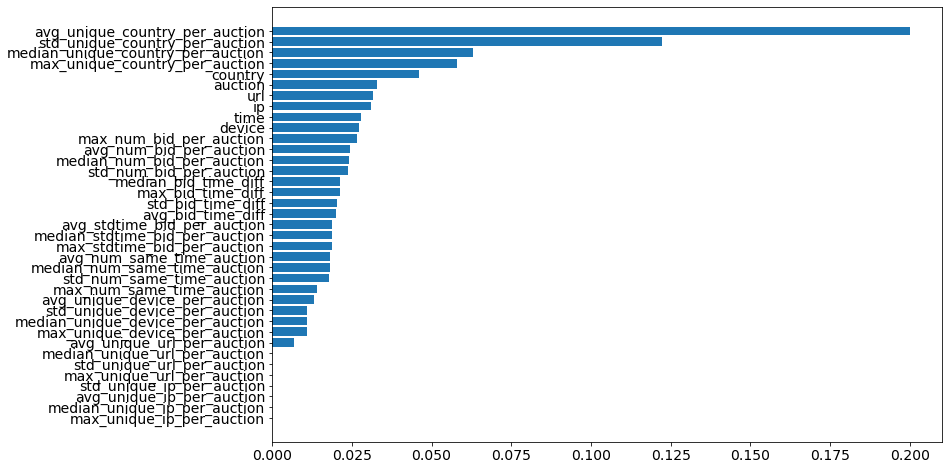

In [59]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt

xgb_model = XGBClassifier(eta= 0.03, max_depth= 3, scale_pos_weight = 18.5, random_state = 0)
xgb_model = xgb_model.fit(X_train, y_train)

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

features_importance = xgb_model.feature_importances_
feature_importances_sorted = np.sort(features_importance)

plt.barh(X.columns, feature_importances_sorted)

#### <u> Re-training The Model After Feature Selection

In [60]:
#with feature selection - test 2 , with gamma

final_feature_cols = [
'avg_unique_url_per_auction',
'max_unique_device_per_auction',
'median_unique_device_per_auction',
'std_unique_device_per_auction',
'avg_unique_device_per_auction',
'max_num_same_time_auction',
'std_num_same_time_auction',
'median_num_same_time_auction',
'avg_num_same_time_auction',
'max_stdtime_bid_per_auction',
'median_stdtime_bid_per_auction',
'avg_stdtime_bid_per_auction',
'avg_bid_time_diff',
'std_bid_time_diff',
'max_bid_time_diff',
'median_bid_time_diff',
'std_num_bid_per_auction',
'median_num_bid_per_auction',
'avg_num_bid_per_auction',
'max_num_bid_per_auction',
'device', 'time', 'ip', 'url', 'auction', 'country',
'max_unique_country_per_auction',
'median_unique_country_per_auction',
'std_unique_country_per_auction',
'avg_unique_country_per_auction'
]

X = train_set[final_feature_cols]
y = train_set['outcome']

In [61]:
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify = y)

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [8,7,6,5,4,3,2],
    'eta': [0.1,0.2,0.05,0.01,0.03],
    'gamma': [0,1,5]
}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)

# Instantiate the grid search model
grid = GridSearchCV(XGBClassifier(random_state=0, scale_pos_weight = 18.5), param_grid, scoring = 'roc_auc',
                          cv = cv, n_jobs = -1)

grid.fit(X_train,y_train)

# print best parameter after tuning
print(grid.best_params_)
print('\n')

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)
print('\n')

# print best score of model
print(grid.best_score_)

C:\Users\felic\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:37:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'eta': 0.03, 'gamma': 0, 'max_depth': 3}


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eta=0.03, gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.0299999993,
              max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=18.5, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=

In [63]:
xgb_model = XGBClassifier(eta= 0.03, max_depth= 3, n_estimators= 100, scale_pos_weight = 18.5, random_state = 0)
xgb_model = xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)


from sklearn import metrics

accuracy = metrics.accuracy_score(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
Precision = metrics.precision_score(y_test, y_pred)

print('Accuracy:', round(accuracy, 4) * 100, '%')
print('AUC:', round(auc, 4)) 
print('Precision:', round(Precision, 4)) 

C:\Users\felic\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:45:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 87.25 %
AUC: 0.826
Precision: 0.2553


#### <u> Final Model

In [64]:
final_xgb_model = XGBClassifier(eta= 0.03, max_depth= 3, scale_pos_weight = 18.5, random_state = 0)
final_xgb_model = final_xgb_model.fit(X, y)


C:\Users\felic\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:45:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [65]:
test_df_to_merge = [test_df, bidder_unique,
avg_unique_url_per_auction,
max_unique_device_per_auction,
median_unique_device_per_auction,
std_unique_device_per_auction,
avg_unique_device_per_auction,
max_num_same_time_auction,
std_num_same_time_auction,
median_num_same_time_auction,
avg_num_same_time_auction,
max_stdtime_bid_per_auction,
median_stdtime_bid_per_auction,
avg_stdtime_bid_per_auction,
avg_bid_time_diff,
std_bid_time_diff,
max_bid_time_diff,
median_bid_time_diff,
std_num_bid_per_auction,
median_num_bid_per_auction,
avg_num_bid_per_auction,
max_num_bid_per_auction,
max_unique_country_per_auction,
median_unique_country_per_auction,
std_unique_country_per_auction,
avg_unique_country_per_auction
]

from functools import reduce
test_set = reduce(lambda l, r: pd.merge(l, r,  on='bidder_id', how='left'), test_df_to_merge)
test_set = test_set.fillna(0)

In [66]:
X_kaggle = test_set[final_feature_cols]
X_kaggle

,avg_unique_url_per_auction,max_unique_device_per_auction,median_unique_device_per_auction,std_unique_device_per_auction,avg_unique_device_per_auction,max_num_same_time_auction,std_num_same_time_auction,median_num_same_time_auction,avg_num_same_time_auction,max_stdtime_bid_per_auction,...,device,time,ip,url,auction,country,max_unique_country_per_auction,median_unique_country_per_auction,std_unique_country_per_auction,avg_unique_country_per_auction
0,1.333333,1.0,1.0,0.000000,1.000000,1.0,0.000000,1.0,1.000000,3.214098e+12,...,2.0,4.0,4.0,3.0,3.0,3.0,2.0,1.0,0.577350,1.333333
1,1.000000,2.0,1.5,0.707107,1.500000,1.0,0.000000,1.0,1.000000,7.443229e+07,...,3.0,3.0,2.0,1.0,2.0,2.0,1.0,1.0,0.000000,1.000000
2,1.071429,2.0,1.0,0.267261,1.071429,1.0,0.000000,1.0,1.000000,1.862296e+11,...,4.0,17.0,4.0,2.0,14.0,3.0,1.0,1.0,0.000000,1.000000
3,1.300000,13.0,1.0,1.637002,1.500000,1.0,0.000000,1.0,1.000000,4.732684e+13,...,81.0,148.0,129.0,80.0,90.0,14.0,1.0,1.0,0.000000,1.000000
4,1.000000,2.0,1.0,0.366348,1.150000,1.0,0.000000,1.0,1.000000,3.428947e+12,...,17.0,23.0,17.0,1.0,20.0,2.0,1.0,1.0,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4695,1.292683,4.0,1.0,1.113662,1.902439,8.0,1.603369,1.0,2.109442,2.847628e+12,...,9.0,466.0,22.0,4.0,41.0,5.0,2.0,1.0,0.331295,1.121951
4696,1.406250,12.0,1.0,1.967221,1.468750,1.0,0.000000,1.0,1.000000,4.164305e+12,...,29.0,66.0,49.0,18.0,32.0,10.0,4.0,1.0,0.530330,1.093750
4697,3.921241,29.0,1.0,4.729156,3.522673,2.0,0.052692,1.0,1.002783,5.257908e+13,...,376.0,2156.0,1460.0,1049.0,419.0,86.0,18.0,1.0,2.213014,1.651551
4698,1.000000,1.0,1.0,0.000000,1.000000,1.0,0.000000,1.0,1.000000,0.000000e+00,...,4.0,5.0,5.0,2.0,5.0,1.0,1.0,1.0,0.000000,1.000000


In [67]:
probabilities = final_xgb_model.predict_proba(X_kaggle)
probabilities

array([[0.9472867 , 0.05271329],
       [0.8752146 , 0.12478542],
       [0.91422963, 0.08577039],
       ...,
       [0.7287762 , 0.2712238 ],
       [0.91422963, 0.08577039],
       [0.9189174 , 0.08108261]], dtype=float32)

In [68]:
kaggle_preds = probabilities[:,1]
kaggle_preds

array([0.05271329, 0.12478542, 0.08577039, ..., 0.2712238 , 0.08577039,
       0.08108261], dtype=float32)

In [69]:
output_dataframe = pd.DataFrame({
    'bidder_id': test_set['bidder_id'],
    'prediction': kaggle_preds
})
output_dataframe.to_csv('my_predictions_xgb_stratify_gamma_final.csv', index=False)  
